##Import packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import xlrd
import numpy as np
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# extracting sample from the main data
#grouped=g.groupby("booking_date")
#grouped.apply(lambda x: x.sample(frac=0.2)).to_csv("/content/drive/My Drive/DS Training/Meterial/trainsample.csv",index=False)

##Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

path="/content/drive/My Drive/DS Training/Meterial/train.csv"
df=pd.read_csv(path)
df

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341419,a804d59b74b1d532a90740ded80dd05873bbef125bc349...,11/02/19,27/02/19,01/03/19,2,2,4,0,47,1,1,2,4,4.0,8.0,1,2,I,1,0095e00c6dae789d37628bd85697e53c423231337994c4...,E,A,c6f3ac57944a531490cd39902d0f777715fd005efac9a3...,5.918087
341420,7062c92a631731e7189cf3dddb20aceeae91a883e14229...,27/02/19,28/02/19,01/03/19,2,4,2,0,45,1,5,3,1,4.0,10.0,1,2,D,1,42d7b97ad0d345da57a4010157729286418481f3d7ad24...,E,A,c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cb...,8.186771
341421,18a5668c302c321dc2d42a48923ceff97af633c66d72ee...,27/02/19,27/02/19,28/02/19,3,3,3,0,45,1,1,3,2,4.0,10.0,4,3,H,1,f393011a27daf3d1676417f48f44ad9ed3541285e71209...,F,A,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,8.381939
341422,1cbe1611a122023d7e994b4cf51fcf28ce44acdbcabbfb...,27/02/19,28/02/19,01/03/19,1,3,5,0,47,2,2,2,2,3.0,8.0,2,3,B,1,b14649c29eb050f4e9b69c7a3afb5dfa00d12dabfd2e40...,D,A,6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef...,8.856035


##Basic analysis- shape and dimensions

In [ ]:
df.channel_code==3

0          True
1         False
2         False
3         False
4         False
          ...  
341419    False
341420    False
341421     True
341422    False
341423     True
Name: channel_code, Length: 341424, dtype: bool

In [ ]:
df.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [ ]:
df.shape

(341424, 24)

In [ ]:
df['memberid'].duplicated().value_counts()

True     240097
False    101327
Name: memberid, dtype: int64

In [ ]:
df.size

8194176

In [ ]:
for column in df.columns:

  g=df[column].isnull().value_counts()
  print (g)

False    341424
Name: reservation_id, dtype: int64
False    341424
Name: booking_date, dtype: int64
False    341424
Name: checkin_date, dtype: int64
False    341424
Name: checkout_date, dtype: int64
False    341424
Name: channel_code, dtype: int64
False    341424
Name: main_product_code, dtype: int64
False    341424
Name: numberofadults, dtype: int64
False    341424
Name: numberofchildren, dtype: int64
False    341424
Name: persontravellingid, dtype: int64
False    341424
Name: resort_region_code, dtype: int64
False    341424
Name: resort_type_code, dtype: int64
False    341424
Name: room_type_booked_code, dtype: int64
False    341424
Name: roomnights, dtype: int64
False    341310
True        114
Name: season_holidayed_code, dtype: int64
False    336660
True       4764
Name: state_code_residence, dtype: int64
False    341424
Name: state_code_resort, dtype: int64
False    341424
Name: total_pax, dtype: int64
False    341424
Name: member_age_buckets, dtype: int64
False    341424
Name: bo

In [ ]:
for column in df.columns:

  g=df[column].isnull().value_counts()

  print (g[g.index==True])

Series([], Name: reservation_id, dtype: int64)
Series([], Name: booking_date, dtype: int64)
Series([], Name: checkin_date, dtype: int64)
Series([], Name: checkout_date, dtype: int64)
Series([], Name: channel_code, dtype: int64)
Series([], Name: main_product_code, dtype: int64)
Series([], Name: numberofadults, dtype: int64)
Series([], Name: numberofchildren, dtype: int64)
Series([], Name: persontravellingid, dtype: int64)
Series([], Name: resort_region_code, dtype: int64)
Series([], Name: resort_type_code, dtype: int64)
Series([], Name: room_type_booked_code, dtype: int64)
Series([], Name: roomnights, dtype: int64)
True    114
Name: season_holidayed_code, dtype: int64
True    4764
Name: state_code_residence, dtype: int64
Series([], Name: state_code_resort, dtype: int64)
Series([], Name: total_pax, dtype: int64)
Series([], Name: member_age_buckets, dtype: int64)
Series([], Name: booking_type_code, dtype: int64)
Series([], Name: memberid, dtype: int64)
Series([], Name: cluster_code, dtype

In [ ]:
g=df['season_holidayed_code'].isnull().value_counts()
type(g)
g[g.index==True]


True    114
Name: season_holidayed_code, dtype: int64

In [ ]:
df.dtypes

reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code          

## Convertion of booking dates & date formates and derviving advance booking

In [ ]:
# convert booking date to date format
df['booking_date'] = pd.to_datetime(df['booking_date'],format='%d/%m/%y')
# Extration of year and month 
#df['booking_year'], df['booking_month'] = df['booking_date'].dt.year, df['booking_month'].dt.month
df['booking_year'] = df['booking_date'].dt.year
df['booking_month']= df['booking_date'].dt.month

In [ ]:
 #convert booking date to date format
df['checkin_date'] = pd.to_datetime(df['checkin_date'],format='%d/%m/%y')
df['checkout_date'] = pd.to_datetime(df['checkout_date'],format='%d/%m/%y')
df['spend_days']= df['checkout_date']-df['checkin_date']
#derive advance bokking days
df['advance_booking']= df['checkin_date']-df['booking_date']


In [ ]:
df.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,booking_year,booking_month,spend_days,advance_booking
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,2018-04-05,2018-04-05,2018-04-06,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,2018,4,1 days,0 days
1,03930f033646d073462b35d411616323597715ac4fc398...,2015-01-23,2015-04-11,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,2015,1,5 days,78 days
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,2015-01-28,2015-02-01,2015-02-05,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,2015,1,4 days,4 days
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,2015-05-02,2015-06-11,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,2015,5,5 days,40 days
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,2015-09-02,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,2015,9,5 days,103 days


## Pivoting Data and Creating Graphs

### What is the average booking value per member? how is it trending by year?

In [ ]:
df.pivot_table(values='amount_spent_per_room_night_scaled',columns='booking_year',aggfunc='mean')

booking_year,2014,2015,2016,2017,2018,2019
amount_spent_per_room_night_scaled,7.49089,7.624088,7.686239,7.776093,7.811722,7.724254


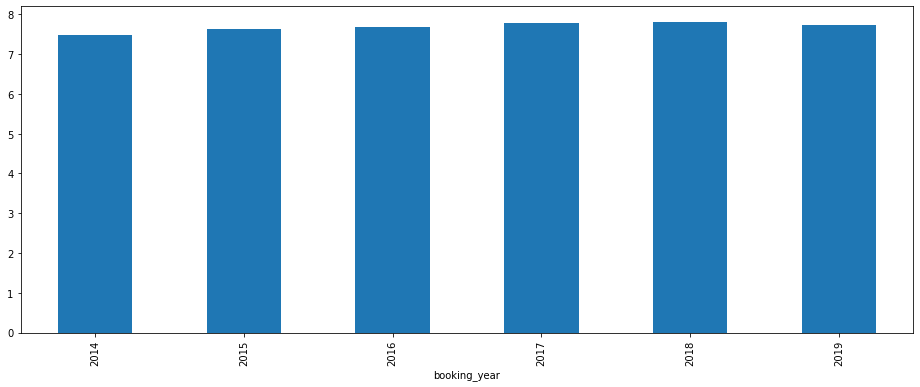

In [ ]:
plt.figure(figsize=(16, 6))
df.groupby(['booking_year'])['amount_spent_per_room_night_scaled'].mean().plot.bar()
# its in between 7 to 8 on an average every year and no significant change

### what are the top resorts in terms of booking, average revenue and children freindly?


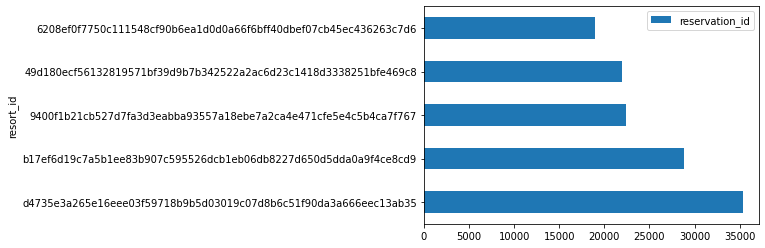

In [ ]:
g= df.pivot_table(index=['resort_id'], values=['reservation_id'], aggfunc='count')
#g['reservation_id']=pd.to_numeric(g['reservation_id'])
g.sort_values(by=['reservation_id'],inplace=True,ascending=False)
g[:5].plot.barh()
# Top 5 resorts in terms of booking

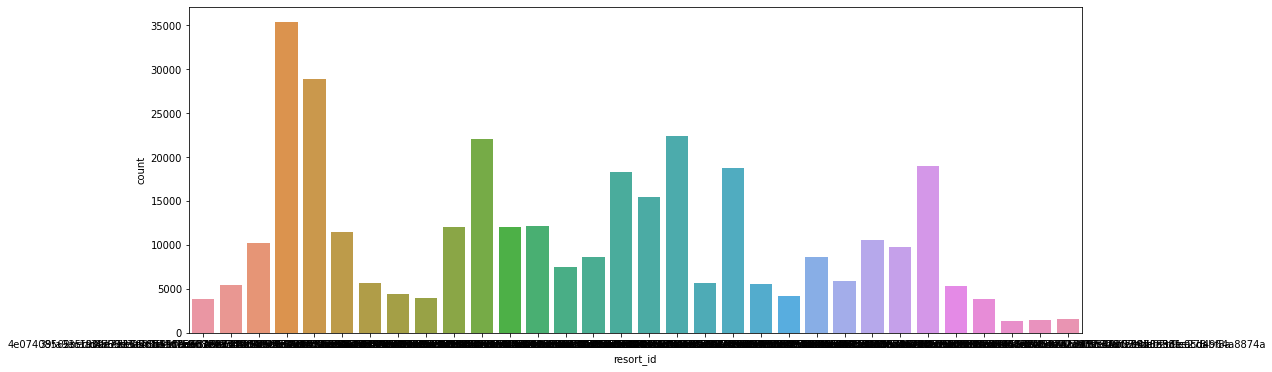

In [ ]:
#another way of producing the bar using count plot
plt.figure(figsize=(16, 6))
sns.countplot(df["resort_id"])

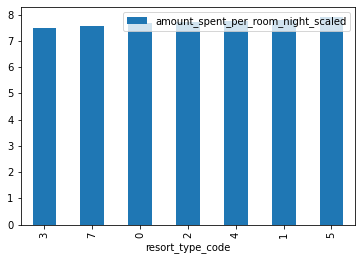

In [ ]:
g= df.pivot_table(index=['resort_type_code'], values=['amount_spent_per_room_night_scaled'], aggfunc='mean')
g.sort_values(by=['amount_spent_per_room_night_scaled'], inplace=True)
g.plot.bar()
# Resort code 5 is top in terms of revenue

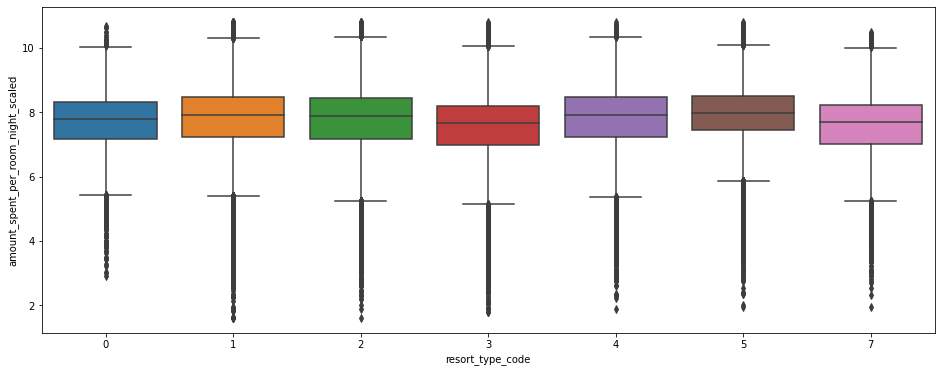

In [ ]:
#another way of producing the bar using box plot
plt.figure(figsize=(16, 6))
sns.boxplot(x='resort_type_code',y='amount_spent_per_room_night_scaled',data=df)
#Resort code 5 is top in terms of revenue

In [ ]:
df.groupby(['state_code_resort','resort_type_code'])['numberofchildren'].count().reset_index()

,state_code_resort,resort_type_code,numberofchildren
0,1,1,33124
1,1,5,26706
2,2,2,55883
3,3,3,33489
4,4,1,14820
5,5,1,5527
6,5,3,15192
7,5,4,12065
8,6,1,50869
9,7,1,37809


<Figure size 2880x1440 with 0 Axes>

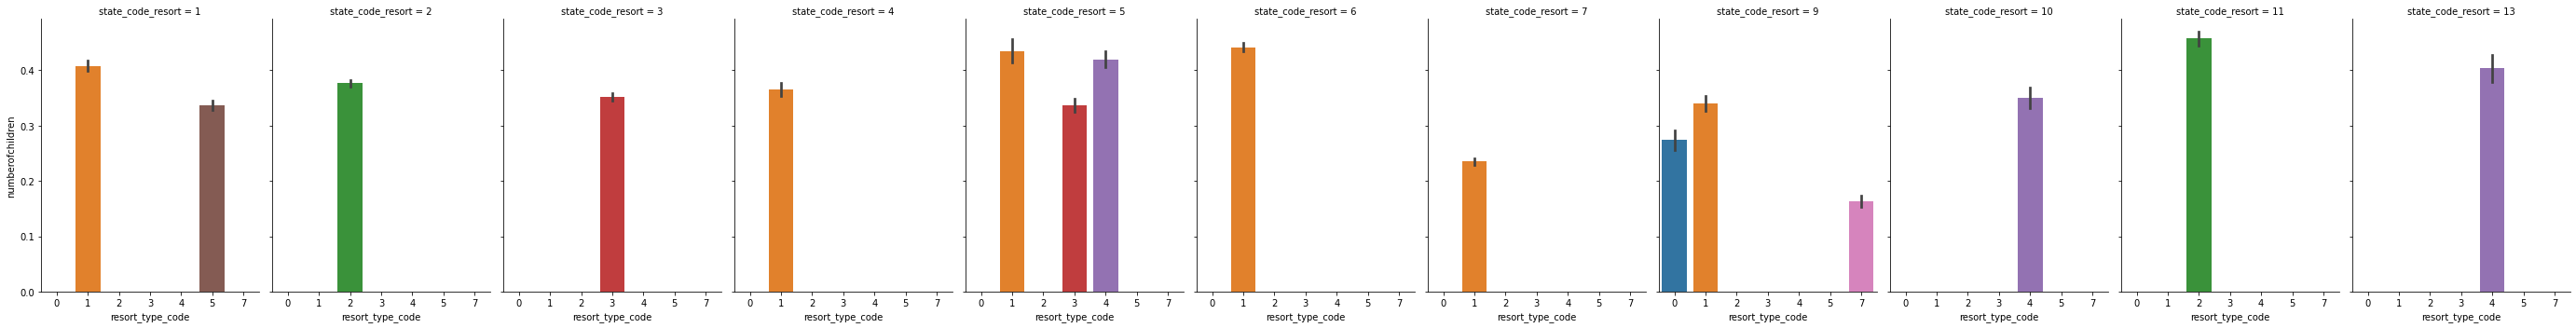

In [ ]:
plt.figure(figsize=(40,20))
#sns.barplot(x='resort_type_code',y='numberofchildren',data=df)
sns.catplot(x='resort_type_code',y='numberofchildren',col='state_code_resort',data=df,kind='bar',aspect=0.7)

#Resort code 4 is top in terms of number of children

### how much time members are spending on resort like spent time, seasons and advance booking time

In [ ]:
df.pivot_table(index=['season_holidayed_code'],values=['roomnights'],columns=['resort_type_code'],aggfunc='sum')

roomnights                                            
resort_type_code               0       1       2      3      4      5      7
season_holidayed_code                                                       
1.0                         1990   51843   19836  13415   5933   7121   3124
2.0                        10171  194668  102948  69328  32841  32425  16323
3.0                         5928  193737  101127  63265  27676  35958  17817
4.0                         1481  109802   66409  39760  18163  23047   9764

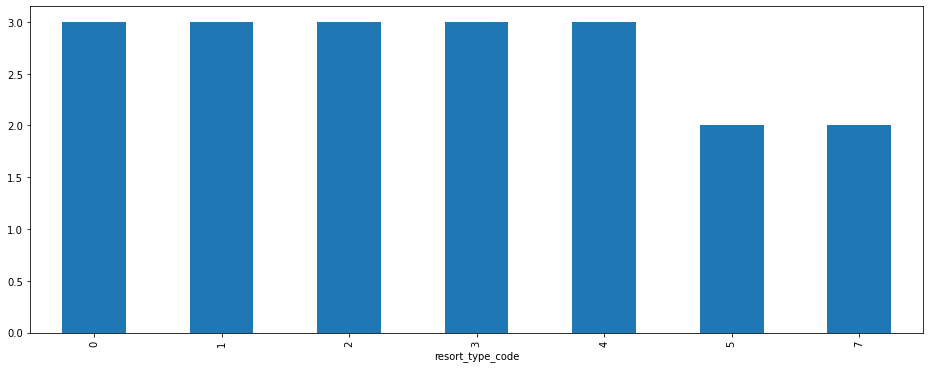

In [ ]:
plt.figure(figsize=(16, 6))
df.groupby(['resort_type_code'])['roomnights'].agg(pd.Series.mode).plot.bar()
#Resort code 0 has the highest time spent, 5 and 7 has the leaset amount spent time

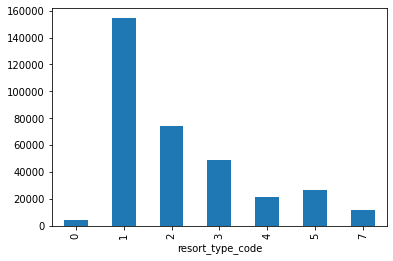

In [ ]:
df.groupby(['resort_type_code'])['advance_booking'].count().plot.bar()
#df['advance_booking'].dtypes
#Resort code 1 has the highest advance bookings(use mean or mode)

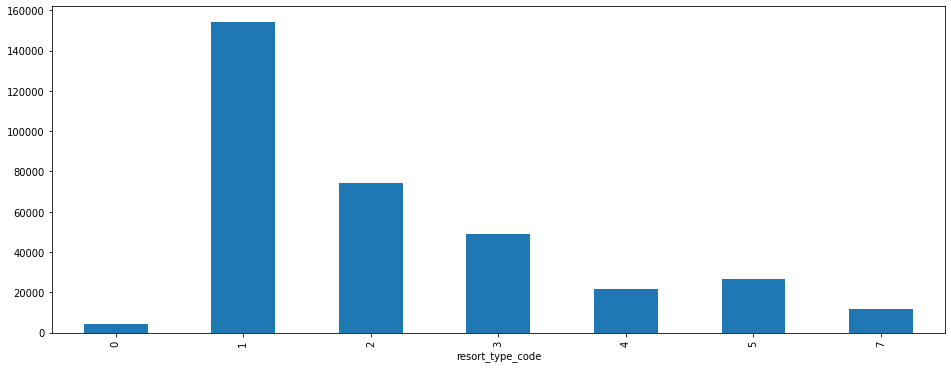

In [ ]:
plt.figure(figsize=(16, 6))
df.groupby(['resort_type_code'])['season_holidayed_code'].count().plot.bar()
#Resort code 1 has the highest season holiday bookings(use mean or mode)

In [ ]:
df.pivot_table(index=['resort_id'],values=['advance_booking'],columns=['resort_region_code'],aggfunc='count')

advance_booking  ...         
resort_region_code                                               1  ...        3
resort_id                                                           ...         
0b918943df0962bc7a1824c0555a389347b4febdc7cf9d1...             NaN  ...      NaN
39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac8...             NaN  ...   5398.0
3e1e967e9b793e908f8eae83c74dba9bcccce6a5535b4b4...             NaN  ...   7490.0
3fdba35f04dc8c462986c992bcf875546257113072a909c...          1325.0  ...      NaN
48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c1...          5711.0  ...      NaN
49d180ecf56132819571bf39d9b7b342522a2ac6d23c141...         22005.0  ...      NaN
4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb...          1421.0  ...      NaN
4e07408562bedb8b60ce05c1decfe3ad16b72230967de01...             NaN  ...   3879.0
4ec9599fc203d176a301536c2e091a19bc852759b255bd6...             NaN  ...  12065.0
535fa30d7e25dd8a49f1536779734ec8286108d115da504...         10168.0  ...      NaN
6208ef0f7750c111548cf90b6ea1d0d0a66f6bff40dbef0...             NaN  ...      NaN
624b60c58c9d8bfb6ff1886c2fd605d2adeb6ea4da57606...             NaN  ...      NaN
670671cd97404156226e507973f2ab8330d3022ca96e0c9...             NaN  ...   5527.0
6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d4...         18780.0  ...      NaN
7902699be42c8a8e46fbbb4501726517e86b22c56a189f7...             NaN  ...   9794.0
7f2253d7e228b22a08bda1f09c516f6fead81df6536eb02...             NaN  ...   3918.0
81b8a03f97e8787c53fe1a86bda042b6f0de9b0ec9c0935...          5917.0  ...      NaN
8722616204217eddb39e7df969e0698aed8e599ba62ed2d...             NaN  ...      NaN
9400f1b21cb527d7fa3d3eabba93557a18ebe7a2ca4e471...             NaN  ...      NaN
98a3ab7c340e8a033e7b37b6ef9428751581760af67bbab...             NaN  ...      NaN
9f14025af0065b30e47e23ebb3b491d39ae8ed17d33739e...             NaN  ...   8683.0
a68b412c4282555f15546cf6e1fc42893b7e07f271557ce...             NaN  ...      NaN
b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d65...         28864.0  ...      NaN
c6f3ac57944a531490cd39902d0f777715fd005efac9a30...          8633.0  ...      NaN
c75cb66ae28d8ebc6eded002c28a8ba0d06d3a78c6b5cbf...         10621.0  ...      NaN
d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f9...             NaN  ...      NaN
da4ea2a5506f2693eae190d9360a1f31793c98a1adade51...             NaN  ...      NaN
e29c9c180c6279b0b02abd6a1801c7c04082cf486ec027a...         18271.0  ...      NaN
e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5...         12074.0  ...      NaN
ef2d127de37b942baad06145e54b0c619a1f22327b2ebbc...             NaN  ...   5309.0
f5ca38f748a1d6eaf726b8a42fb575c3c71f1864a814330...             NaN  ...   4210.0
ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ffc...             NaN  ...      NaN

[32 rows x 3 columns]

### Are the any resorts that attract more advanced bookings and why ?

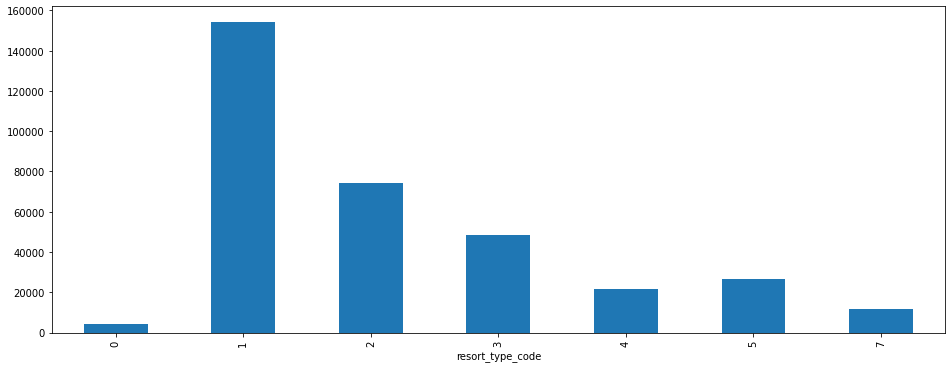

In [ ]:
plt.figure(figsize=(16, 6))
df.groupby(['resort_type_code'])['advance_booking'].count().plot.bar()
#Resort code 1 has the more no.of advanced bookings

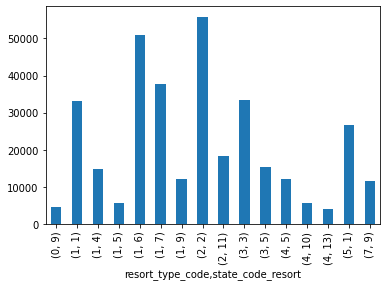

In [ ]:
#why
df.groupby(['resort_type_code','state_code_resort'])['advance_booking'].count().plot.bar()
#there could be many other reasons but stat code resort is one of them

### is there any relationship between advance booking and time spent

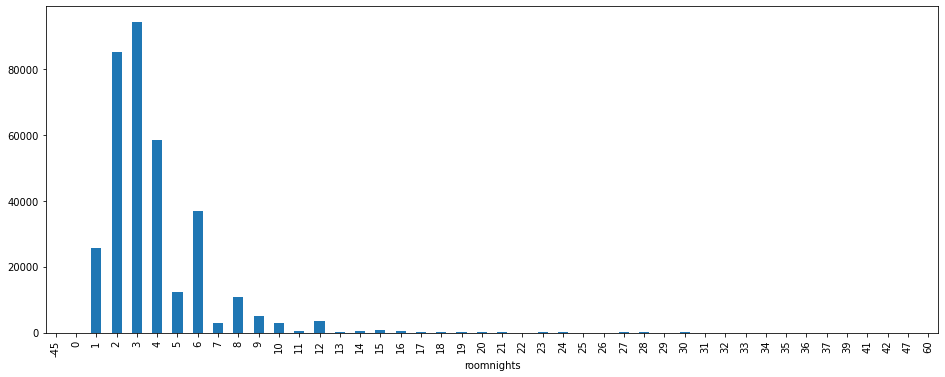

In [ ]:
plt.figure(figsize=(16, 6))
df.groupby(['roomnights'])['advance_booking'].count().plot.bar()
#No

### Are there any resorts for specific seasons or evernts

In [ ]:
g=df.pivot_table(index=['season_holidayed_code'],values=['reservation_id'],columns=['resort_type_code'],aggfunc='count')
g

reservation_id                                       
resort_type_code                   0      1      2      3     4     5     7
season_holidayed_code                                                      
1.0                              440  14286   4946   3349  1435  1806   703
2.0                             2439  56889  27257  18546  8566  8920  4154
3.0                             1297  53512  25514  16504  7177  9853  4330
4.0                              286  29523  16437  10282  4441  6127  2291

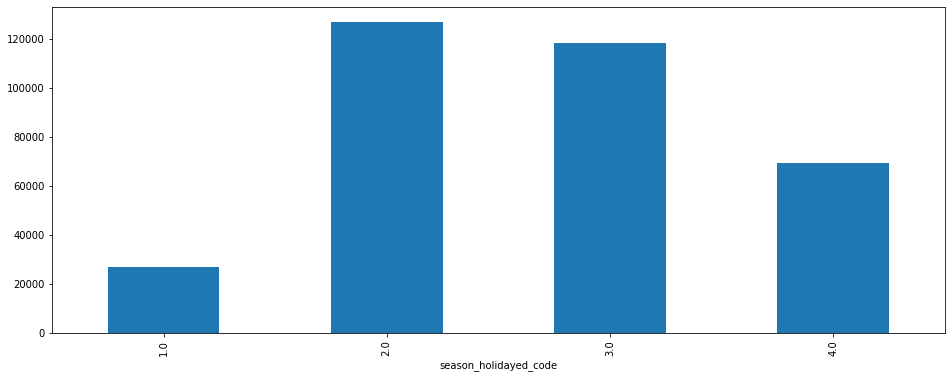

In [ ]:
plt.figure(figsize=(16, 6))
df.groupby(['season_holidayed_code'])['resort_type_code'].count().plot.bar()
#Resort code 1  and  holiday season code 2 is the good combination 

### Can we group resorts by revenue

In [ ]:
#doubt
g= df.pivot_table(index=['resort_type_code'],values=['amount_spent_per_room_night_scaled'],aggfunc='sum')
g.sort_values(by=['amount_spent_per_room_night_scaled'],inplace=True,ascending=False)
g

,amount_spent_per_room_night_scaled
resort_type_code,
1,1.200020e+06
2,5.720682e+05
3,3.649699e+05
5,2.107243e+05
4,1.674017e+05
7,8.668978e+04
0,3.419315e+04


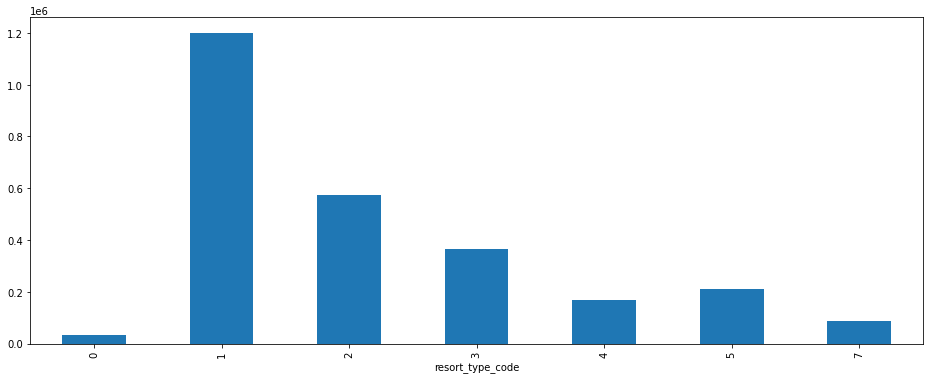

In [ ]:
plt.figure(figsize=(16, 6))
df.groupby(['resort_type_code'])['amount_spent_per_room_night_scaled'].sum().plot.bar()
#yes.. resort code 1 has the highest revenue